In [1]:
import numpy as np
from pathlib import Path

import matplotlib.pyplot as plt
import seaborn as sns

profiles = np.load(Path.home()/'group'/'project'/'profiles_trap_10.npy')

def unpack_profiles(profiles):
    
    z = np.zeros(profiles.size)
    magnetic_fields = {}
    for i in range(5):
        magnetic_fields[i] = np.zeros(profiles.size)
    for i in range(profiles.size):
        
        z[i] = profiles[i][0]
        for j in range(5):
            magnetic_fields[j][i] = profiles[i][j+1]
            
    return z, magnetic_fields



In [2]:
profiles.dtype

dtype([('z', '<f8'), ('r=0cm', '<f8'), ('r=1cm', '<f8'), ('r=2cm', '<f8'), ('r=3cm', '<f8'), ('r=4cm', '<f8')])

In [3]:
z, fields = unpack_profiles(profiles)

In [4]:
sns.set_theme(context='talk', style='whitegrid', font_scale=1.2)
clist = sns.color_palette('flare_r', n_colors=5)



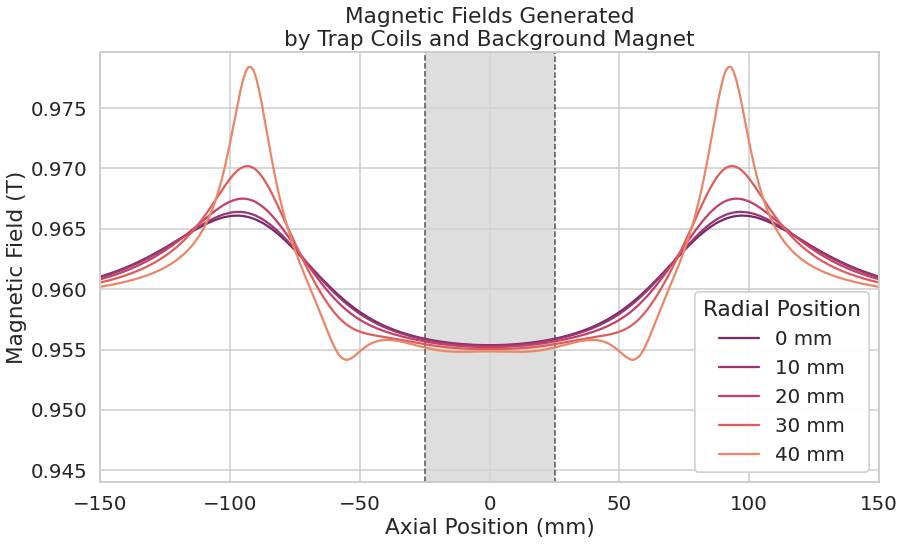

In [5]:
from matplotlib.patches import Patch

fig = plt.figure(figsize=(13,8))
ax = fig.add_subplot(1,1,1)

for i in range(5):
    ax.plot(
        z*10,
        fields[i],
        color=clist[i],
        label=f'{i*10} mm'
    )
    

ylims = ax.get_ylim()
#vline1, = ax.plot(np.ones(2)*-25, np.array([0.94, 0.98]),color='k', ls='--')
#vline2, = ax.plot(np.ones(2)*25, np.array([0.94, 0.98]),color='k', ls='--')

plt.axvspan(-25, 25, 0, 1, alpha=0.75, facecolor='lightgrey', edgecolor='k', ls='--')
#plt.axvspan(-25, 25, 0, 1, alpha=1, edgecolor='k', facecolor='None', ls='--')

patch = Patch(facecolor='lightgrey', alpha=0.75, edgecolor='k', ls='--')

ax.set_ylim(0.944, ylims[1])
ax.set_xlim(-150,150)
    
ax.set_xlabel('Axial Position (mm)')
ax.set_ylabel('Magnetic Field (T)')
ax.set_title('Magnetic Fields Generated'+'\n'+'by Trap Coils and Background Magnet')
legend1 = plt.legend(loc=4, title='Radial Position')
#legend2 = plt.legend([patch], ['Antenna Array'+'\n'+'Approximate Size'], loc=3, )
plt.gca().add_artist(legend1)


plt.tight_layout(pad=1.05)
plt.savefig(Path.home()/'group'/'project'/'plots'/'230210_magnetic_trap_profile', dpi=144)


